# 1️⃣. Objetivo del desafío

Responder preguntas como: 
* ¿Quiénes son los clientes con mayor riesgo de evasión? 
* ¿Qué variables influyen más en ese comportamiento? 
* ¿Y qué perfil de cliente debemos cuidar con mayor atención? 

Este conocimiento es clave para implementar acciones de retención y estrategias personalizadas.

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico



# 2️⃣. Preparación de los datos

In [1]:
import pandas as pd

In [2]:
df_telecom = pd.read_csv('TelecomX_tratados.csv')
df_telecom.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
5346,7315-WYOAW,False,Male,False,False,False,13,True,True,Fiber optic,...,False,True,True,True,Month-to-month,False,Electronic check,100.75,1313.25,3.36
2861,3976-NLDEZ,False,Male,False,False,False,1,True,False,No,...,False,False,False,False,Month-to-month,False,Mailed check,20.60,20.60,0.69
1355,1960-UYCNN,False,Male,False,False,False,10,True,True,Fiber optic,...,True,False,False,True,Month-to-month,True,Electronic check,95.25,1021.55,3.18
4593,6308-CQRBU,False,Female,False,True,False,71,True,True,Fiber optic,...,True,True,True,True,Two year,False,Electronic check,109.25,7707.70,3.64
179,0280-XJGEX,True,Male,False,False,False,49,True,True,Fiber optic,...,True,False,True,True,Month-to-month,True,Bank transfer (automatic),103.70,5036.30,3.46


## .1. Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [3]:
df_telecom.drop(['customerID', 'Cuentas_diarias'], axis=1, inplace=True)
df_telecom.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
2428,True,Male,True,True,False,21,True,False,Fiber optic,No,False,False,False,False,False,Month-to-month,True,Electronic check,69.10,1474.75
3052,False,Female,False,False,False,6,False,False,DSL,No,False,False,False,True,True,Month-to-month,False,Credit card (automatic),45.00,298.70
6573,True,Male,True,True,False,27,False,False,DSL,Yes,False,False,False,False,False,Month-to-month,False,Credit card (automatic),30.75,805.10
6046,False,Female,False,True,True,72,True,True,Fiber optic,Yes,True,True,True,False,True,Two year,False,Credit card (automatic),107.45,7658.30
3711,False,Male,False,True,True,49,True,False,Fiber optic,No,True,True,False,True,False,Month-to-month,True,Credit card (automatic),90.40,4494.65


## .2. Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [4]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   bool   
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   bool   
 3   Partner           7256 non-null   bool   
 4   Dependents        7256 non-null   bool   
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   bool   
 7   MultipleLines     7256 non-null   bool   
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   bool   
 11  DeviceProtection  7256 non-null   bool   
 12  TechSupport       7256 non-null   bool   
 13  StreamingTV       7256 non-null   bool   
 14  StreamingMovies   7256 non-null   bool   
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   bool   


In [5]:
df_telecom.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total'],
      dtype='object')

In [6]:
df_telecom.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,False,Female,False,True,True,9,True,False,DSL,No,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,False,Male,False,False,False,9,True,True,DSL,No,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,True,Male,False,False,False,4,True,False,Fiber optic,No,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,True,Male,True,True,False,13,True,False,Fiber optic,No,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,True,Female,True,True,False,3,True,False,Fiber optic,No,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# 1. Crea una instancia del codificador
encoder = OneHotEncoder(dtype=int, sparse_output=False)

# 2. Ajusta (fit) y transforma (transform) las columnas categóricas
datos_codificados = encoder.fit_transform(df_telecom[categoricas])

# 3. Obtiene los nombres de las nuevas columnas para crear un nuevo DataFrame
column_names = encoder.get_feature_names_out(categoricas)

# 4. Crear un DataFrame con los datos codificados
df_codificado = pd.DataFrame(datos_codificados, columns=column_names)

# 5. Unir los datos codificados con las columnas no categóricas originales
# Primero, eliminamos las columnas categóricas originales del DataFrame
df_sin_categoricas = df_telecom.drop(columns=categoricas)

# Luego, concatenamos el DataFrame sin las categóricas con el DataFrame codificado
df_codificado = pd.concat([df_sin_categoricas, df_codificado], axis=1)

df_codificado

,tenure,Monthly,Total,Churn_False,Churn_True,gender_Female,gender_Male,SeniorCitizen_False,SeniorCitizen_True,Partner_False,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_False,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,65.60,593.30,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,9,59.90,542.40,1,0,0,1,1,0,1,...,1,1,0,0,1,0,0,0,0,1
2,4,73.90,280.85,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,13,98.00,1237.85,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13,55.15,742.90,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
7252,22,85.10,1873.70,0,1,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
7253,2,50.30,92.75,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7254,67,67.85,4627.65,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,1


## .3. Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [9]:
df_codificado['Churn_True'].value_counts(normalize=True)*100

Churn_True
0    71.154906
1    28.845094
Name: proportion, dtype: float64

```Churn_True``` significa abandona $$1 = \text{True}$$ $$0 = \text{False}$$

Por lo tanto si existe un desbalance en los datos

In [10]:
df_codificado.columns

Index(['tenure', 'Monthly', 'Total', 'Churn_False', 'Churn_True',
       'gender_Female', 'gender_Male', 'SeniorCitizen_False',
       'SeniorCitizen_True', 'Partner_False', 'Partner_True',
       'Dependents_False', 'Dependents_True', 'PhoneService_False',
       'PhoneService_True', 'MultipleLines_False', 'MultipleLines_True',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_False', 'OnlineBackup_True', 'DeviceProtection_False',
       'DeviceProtection_True', 'TechSupport_False', 'TechSupport_True',
       'StreamingTV_False', 'StreamingTV_True', 'StreamingMovies_False',
       'StreamingMovies_True', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_False', 'PaperlessBilling_True',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'Payme

## .4. Eliminación columnas repetidas

In [11]:
# Variables a eliminar:
cols_a_eliminar = ['Churn_False', 
                   'gender_Male',
                   'SeniorCitizen_False',
                   'Partner_False',
                   'Dependents_False',
                   'PhoneService_False',
                   'MultipleLines_False',
                   'OnlineBackup_False',
                   'DeviceProtection_False',
                   'TechSupport_False',
                   'StreamingTV_False',
                   'StreamingMovies_False',
                   'PaperlessBilling_False'
                  ]

df_codificado.drop(columns=cols_a_eliminar, inplace=True)
df_codificado

,tenure,Monthly,Total,Churn_True,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,...,StreamingTV_True,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,65.60,593.30,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,9,59.90,542.40,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,0,1,1,0,1,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,1,1,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13,55.15,742.90,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7252,22,85.10,1873.70,1,0,0,1,0,1,1,...,0,1,1,0,0,1,0,0,1,0
7253,2,50.30,92.75,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
7254,67,67.85,4627.65,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1


## .5. Balanceo de Clases

Aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

### Función para saber que porcentaje va en ```sampling_strategy```

"""
    Aplica SMOTE para balancear un DataFrame al porcentaje deseado de clase minoritaria.
    
    Parámetro:
    -----------
    PorcentMinori : float
        Porcentaje deseado de la clase minoritaria (ej. 0.4 para 40%).
        
    Retorna:
    --------
    sampling_ratio
    porcentaje adecuado para el balanceo según el porcentaje minoritario deseado
    """

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
def porcent_samplig(PorcentMinori):
    # Verifica que el porcentaje sea válido
    if not (0 < PorcentMinori < 0.5):
        raise ValueError("PorcentMinori debe estar entre 0 y 0.5 (ej. 0.4 para 40%).")
    
    # Calcula el ratio minoritaria/mayoritaria
    sampling_ratio = PorcentMinori / (1 - PorcentMinori)
    
    return sampling_ratio

In [14]:
porcent_samplig(0.4)

0.6666666666666667

### Balanceo

In [15]:
# columna objetivo es 'Churn_True'
X = df_codificado.drop(columns=['Churn_True'])
y = df_codificado['Churn_True']

# Crea el oversampler con proporción 60-40
# 0.4 significa que el número de minoritarios será el 40% del total final
smote = SMOTE(sampling_strategy=porcent_samplig(0.4), random_state=42)

X_res, y_res = smote.fit_resample(X, y)

# Une en un DataFrame de nuevo
df_balanceado = pd.concat([pd.DataFrame(X_res, columns=X.columns),
                           pd.Series(y_res, name='Churn_True')], axis=1)

# Verifica nuevo balance
df_balanceado['Churn_True'].value_counts(normalize=True)

Churn_True
0    0.6
1    0.4
Name: proportion, dtype: float64

In [16]:
# Obtiene tamaños
original_counts = df_codificado['Churn_True'].value_counts()
balance_counts = df_balanceado['Churn_True'].value_counts()

# Cuántos casos sintéticos se crearon para la minoritaria
synthetic_created = balance_counts[1] - original_counts[1]
print(f"Casos sintéticos creados para la clase 1: {synthetic_created}")


Casos sintéticos creados para la clase 1: 1349


## .6. Normalización o Estandarización

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

### Calcular sesgo de las columnas numéricas

Esto para saber si los datos son simétricos o no

In [17]:
import numpy as np

In [18]:
# Calcular el sesgo de todas las columnas numéricas
skewness = df_balanceado[['tenure', 'Monthly', 'Total']].skew()

print("Sesgo de cada columna:")
print(skewness)

# Interpretar los resultados
print("\nInterpretación:")
for column, skew_value in skewness.items():
    if skew_value > 0.5:
        print(f"La columna '{column}' está sesgada a la derecha (positivo), valor: {skew_value:.2f}")
    elif skew_value < -0.5:
        print(f"La columna '{column}' está sesgada a la izquierda (negativo), valor: {skew_value:.2f}")
    else:
        print(f"La columna '{column}' es aproximadamente simétrica, valor: {skew_value:.2f}")

Sesgo de cada columna:
tenure     0.357856
Monthly   -0.297937
Total      1.035659
dtype: float64

Interpretación:
La columna 'tenure' es aproximadamente simétrica, valor: 0.36
La columna 'Monthly' es aproximadamente simétrica, valor: -0.30
La columna 'Total' está sesgada a la derecha (positivo), valor: 1.04


En este caso como (al menos 1 está sesgado) el ```Total``` está sesgada a la derecha entonces indica que el dataframe está sesgado a la derecha. Por lo que, para poder aplicar un modelo KNN será necesario normalizar los datos de la columna sesgada.

### Normalizar con raíz cuadrada

Solo se normaliza la columna sesgada.

In [19]:
df_normalizado = df_balanceado.copy()
# Aplicar la transformación logarítmica a la columna 'Total'
df_normalizado['Total_sqrt'] = np.sqrt(df_codificado['Total'])
df_normalizado.drop(['Total'], axis=1, inplace=True)

# Opcional: Volver a calcular el sesgo para verificar la mejora
sesgo_despues = df_normalizado['Total_sqrt'].skew()
print(f"El sesgo de 'Total_sqrt' después de la transformación es: {sesgo_despues:.2f}")

El sesgo de 'Total_sqrt' después de la transformación es: 0.31


# 3️⃣. Correlación y Selección de Variables

## .1. Análisis dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:
* Tiempo de contrato × Cancelación
* Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

### Tiempo de contrato vs Cancelación

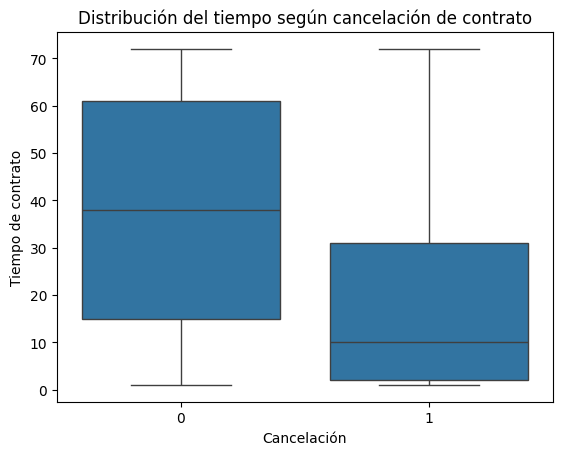

In [47]:
sns.boxplot(data=df_normalizado, x='Churn_True', y='tenure')

plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.title('Distribución del tiempo según cancelación de contrato')
plt.show()

En el boxplot anterior, donde se compara el tiempo de contrato (tenure) con la cancelación (Churn_True), se observa que la mediana para los clientes que cancelan es de aproximadamente $10$ meses, mientras que la mediana para los que no cancelan es de alrededor de $37$ meses. \
Esto significa que, para el grupo que cancela, el $50 \%$ de ellos lo hace antes o en los primeros $10$ meses de contrato, mientras que para el grupo que no cancela, el $50 \%$ permanece en la compañía durante $37$ meses o más.

El grupo que no cancela tiene tiempos de contrato claramente más altos y menos dispersos hacia valores bajos, mientras que el grupo que cancela muestra mayor concentración de clientes con contratos cortos, pero con algunos que permanecen bastante tiempo antes de irse (cola superior larga).

### Gasto total vs Cancelación

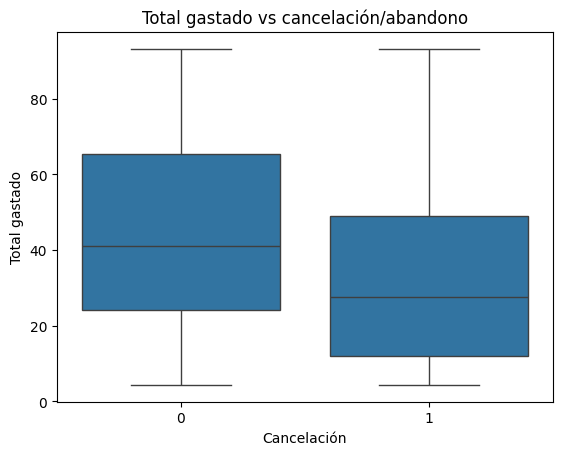

In [46]:
sns.boxplot(data=df_normalizado, x='Churn_True', y='Total_sqrt')

plt.xlabel('Cancelación')
plt.ylabel('Total gastado')
plt.title('Total gastado vs cancelación/abandono')
plt.show()

## .2. Análisis de correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [20]:
df_normalizado.corr()

,tenure,Monthly,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,InternetService_DSL,InternetService_Fiber optic,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_True,Total_sqrt
tenure,1.000000,0.238315,0.014646,0.036352,0.409012,0.192865,0.019415,0.352746,0.011039,0.003642,...,-0.667290,0.235671,0.557551,0.006914,0.257500,0.255611,-0.202942,-0.201397,-0.371776,0.867959
Monthly,0.238315,1.000000,-0.012005,0.200809,0.074798,-0.129575,0.277143,0.478904,-0.209159,0.790388,...,0.056523,-0.003768,-0.087428,0.346936,0.013550,0.011520,0.267144,-0.390947,0.198397,0.643470
gender_Female,0.014646,-0.012005,1.000000,0.014259,0.036750,0.021290,0.005447,0.013306,0.012919,-0.012822,...,-0.020392,0.020178,0.035181,0.004216,0.044962,0.031035,-0.015291,0.012680,-0.081394,0.000050
SeniorCitizen_True,0.036352,0.200809,0.014259,1.000000,0.045837,-0.180593,0.021084,0.146623,-0.098837,0.230076,...,0.112208,-0.029866,-0.090401,0.151642,-0.000728,-0.006725,0.161756,-0.137729,0.074391,0.108040
Partner_True,0.409012,0.074798,0.036750,0.045837,1.000000,0.464623,0.020256,0.154805,0.019980,-0.024423,...,-0.309586,0.121634,0.274661,-0.005026,0.147275,0.117699,-0.075832,-0.066211,-0.236769,0.337863
Dependents_True,0.192865,-0.129575,0.021290,-0.180593,0.464623,1.000000,-0.000234,-0.010368,0.072873,-0.181214,...,-0.250872,0.102283,0.228986,-0.103882,0.085532,0.095377,-0.146968,0.079000,-0.230842,0.077972
PhoneService_True,0.019415,0.277143,0.005447,0.021084,0.020256,-0.000234,1.000000,0.276449,-0.449100,0.315428,...,0.007731,0.003508,0.010859,0.032113,0.013676,-0.006319,0.020584,0.003373,-0.007569,0.096343
MultipleLines_True,0.352746,0.478904,0.013306,0.146623,0.154805,-0.010368,0.276449,1.000000,-0.198432,0.348712,...,-0.114465,0.016585,0.115792,0.158318,0.082613,0.067586,0.077467,-0.211895,-0.010531,0.475235
InternetService_DSL,0.011039,-0.209159,0.012919,-0.098837,0.019980,0.072873,-0.449100,-0.198432,1.000000,-0.642950,...,-0.071061,0.062606,0.049579,-0.072636,0.044403,0.071321,-0.110700,0.063933,-0.162271,-0.023746
InternetService_Fiber optic,0.003642,0.790388,-0.012822,0.230076,-0.024423,-0.181214,0.315428,0.348712,-0.642950,1.000000,...,0.248963,-0.088265,-0.214272,0.322825,-0.050364,-0.071633,0.337338,-0.316827,0.299883,0.344514


In [ ]:
corr_matrix = df_normalizado.corr()

# Convierte la matriz de correlación en una serie
corr_pairs = corr_matrix.unstack()

# Filtra las parejas con alta correlación (mayor a 0.7 o menor a -0.7)
# y elimina la correlación de la variable consigo misma
high_corr_pairs = corr_pairs[(corr_pairs > 0.7) | (corr_pairs < -0.7)]
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Ordena los resultados y elimina duplicados para una vista más limpia
high_corr_pairs = high_corr_pairs.sort_values(ascending=False).drop_duplicates()

print("Pares con alta correlación (abs > 0.7):")
print(high_corr_pairs)

Pares con alta correlación (abs > 0.7):
tenure   Total_sqrt                     0.867959
Monthly  InternetService_Fiber optic    0.790388
         InternetService_No            -0.746261
dtype: float64


In [ ]:
# Obtiene una lista única de las variables que tienen alta correlación entre sí
variables_a_revisar = pd.unique(high_corr_pairs.index.get_level_values(0).union(high_corr_pairs.index.get_level_values(1)))

# Calcula la correlación de esas variables con la variable objetivo
correlacion_con_objetivo = df_normalizado[variables_a_revisar].corrwith(df_normalizado['Churn_True'])

# Imprime los resultados
print("Variables con alta multicolinealidad y su correlación con 'Churn_True':")
print(correlacion_con_objetivo.sort_values(ascending=False))

Variables con alta multicolinealidad y su correlación con 'Churn_True':
InternetService_Fiber optic    0.299883
Monthly                        0.198397
Total_sqrt                    -0.215410
InternetService_No            -0.242508
tenure                        -0.371776
dtype: float64


### Observaciones

#### **```tenure``` y ```Total_sqrt```**
1. Se nota que ```tenure``` y ```Total_sqrt``` tienen una alta correlación $(0.867959)$. Debido a esta alta correlación, existe un alto riesgo de multicolinealidad en el modelo. Para manejarlo, sería mejor eliminar una de las dos variables antes de entrenar el modelo.

2. La correlación de ```tenure``` con ```Churn_True``` es de $-0.371776$, que es más fuerte que la de ```Total_sqrt```, que es de $-0.215410$. Un valor más cercano a -1 (o 1) indica una relación más fuerte. Por lo tanto, ```tenure``` es un predictor más potente para ```Churn_True``` que ```Total_sqrt```.


Como el objetivo del análisis no está relacionado con el total gastado por los clientes entonces es posible eliminar ```Total_sqrt```.

---

#### **```Monthly``` y ```InternetService_Fiber optic```**
1. La correlación entre ambas variables es de $0.790388$, por lo que es alta, igual que en la pareja anterior se debe eliminar una de las dos para evitar colinealidad.

2. La correlación de ```Monthly``` con ```Churn_True``` es de $0.198397$, y la de ```InternetService_Fiber optic``` con ```Churn_True``` es de $0.299883$, es decir que ```InternetService_Fiber optic``` es un predictor más fuerte para ```Churn_True```.

Por lo que en esta pareja la opción a eliminar parece ser ```Monthly```, pero antes de tomar la decisión hay que ver como se relaciona con la otra variable con la que se halló la correlación.


---

#### **```Monthly``` y ```InternetService_No```**
1. Entre ambas variables existe una alta correlación $(-0.746261)$, esto indica que dentro del modelo puede provocar multicolinealidad, por lo que es necesario eliminar una de las dos.

2. Lac correlación de ```Monthly``` con ```Churn_True``` es de $0.198397$, y la de ```InternetService_No``` con ```Churn_True``` es de $-0.242508$, es decir que ```InternetService_No``` es un predictor más fuerte para ```Churn_True```.

Así que en este caso también se recomienda eliminar ```Monthly``` para evitar multicolinealidad en el modelo, además el dato no aporta nada al objetivo del modelo.

### Conclusión

Las características (columnas) a eliminar son:
* Monthly
* Total_sqrt

In [36]:
df_telecom2 = df_normalizado.copy()
df_telecom2.drop(columns=['Monthly', 'Total_sqrt'], inplace=True)
df_telecom2

,tenure,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_True
0,9,1,0,1,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,9,0,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
2,4,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,13,0,1,1,0,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
4,3,1,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,51,0,0,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
8601,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
8602,1,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
8603,1,1,0,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
